# Dataset analysis for `vu_dataset`

This notebook is a dataset analysis for the dataset `vu_dataset_mini_ver2`.

In [1]:
import pandas as pd
import glob 
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns


# Top-25 CWEs + 1 non-vulnerable class
class_list = [
    'cwe-787',  # Out-of-bounds Write
    'cwe-79',   # Improper Neutralization of Input During Web Page Generation ('Cross-site Scripting')
    'cwe-89',   # Improper Neutralization of Special Elements used in an SQL Command ('SQL Injection')
    'cwe-416',  # Use After Free
    'cwe-78',   # Improper Neutralization of Special Elements used in an OS Command ('OS Command Injection')
    'cwe-20',   # Improper Input Validation
    'cwe-125',  # Out-of-bounds Read
    'cwe-22',   # Improper Limitation of a Pathname to a Restricted Directory ('Path Traversal')
    'cwe-352',  # Cross-Site Request Forgery (CSRF)
    'cwe-434',  # Unrestricted Upload of File with Dangerous Type
    'cwe-862',  # Missing Authorization
    'cwe-476',  # NULL Pointer Dereference
    'cwe-287',  # Improper Authentication
    'cwe-190',  # Integer Overflow or Wraparound
    'cwe-502',  # Deserialization of Untrusted Data
    'cwe-77',   # Improper Neutralization of Special Elements used in a Command ('Command Injection')
    'cwe-119',  # Improper Restriction of Operations within the Bounds of a Memory Buffer
    'cwe-798',  # Use of Hard-coded Credentials
    'cwe-918',  # Server-Side Request Forgery (SSRF)
    'cwe-306',  # Missing Authentication for Critical Function
    'cwe-362',  # Concurrent Execution using Shared Resource with Improper Synchronization ('Race Condition')
    'cwe-269',  # Improper Privilege Management
    'cwe-94',   # Improper Control of Generation of Code ('Code Injection')
    'cwe-863',  # Incorrect Authorization
    'cwe-276',   # Incorrect Default Permissions
    'non-vul' # non-vulnerable snippets
]

dict_language = {'python': 'Python', 'c': 'C', 'cpp': 'C++', 'javascript': 'JavaScript', 'java': 'Java'}

# Function to read and process files from the dataset
def read_dataset(dataset_path, language):
    data = []
    lang_path = os.path.join(dataset_path, language)
    for c_l in class_list:
        c_l_path = os.path.join(lang_path, c_l)
        
        # Finding all files that start with 'code_before' in cwe_path
        code_before_files = glob.glob(os.path.join(c_l_path, 'code_before*'))
        
        for file_path in code_before_files:
            with open(file_path, 'r') as file:
                code_before = file.read()
                # Process to remove metadata
                code_before, source = remove_and_fetch_metadata(code_before)
                dataset_name = postprocess_source(source)
            # if code_before is empty, skip it
            if code_before == '':
                continue

            data.append({'true_label': c_l, 'language': language, 'vul_file_name': file_path, 'vul_file_content': code_before, 'source': dataset_name})
                
    return data


# Function to remove metadata from code and save it to an array.
def remove_and_fetch_metadata(code_content):
    # Split the code content into lines
    lines = code_content.split('\n')
    # Remove the first line assuming it's always metadata
    lines_without_metadata = lines[1:]

    return '\n'.join(lines_without_metadata), lines[0]


def postprocess_source(source):
    # TODO: there are three datasets that have been reffered to this dataset: CVEfixe, cwe-snippets, and JSVulnerabilityDataSet.
    # The `source` should contain at least one of these three datasets.
    # However, the `source` might contain other information as well. If so, we just assign it to `other`.
    
    if 'CVEfixe' in source:
        return 'CVEfixes'
    elif 'cwe-snippets' in source:
        return 'CWE-snippets'
    elif 'JSVulnerabilityDataSet' in source:
        return 'JSV'
    else:
        return 'other'


def make_excel_file(results):
    # If `artifacts` directory does not exist, create it
    if not os.path.exists('./artifacts'):
        os.makedirs('./artifacts')
    
    # Create a CSV file to save the results
    df = pd.DataFrame(results)
    # Save the file with a timestamp  
    df.to_excel('./artifacts/vul_dataset_mini_ver2_analysis.xlsx', index=False)
    print("Results saved to Excel successfully: ./artifacts/vul_dataset_mini_ver2_analysis.xlsx")
    

In [2]:
languages = ['python', 'c', 'cpp', 'javascript', 'java']
results = []
# Read dataset
dataset_path = "./vul_dataset"

# Traverse all languages stored in the dataset
for l in tqdm(languages):
    data = read_dataset(dataset_path, l)
    for item in data:
        results.append({
            'true_label': item['true_label'],
            'language': item['language'],
            'vul_file_name': item['vul_file_name'],
            'vul_file_content': item['vul_file_content'],
            'source': item['source']
        })
    
# Make an excel file
make_excel_file(results)

100%|██████████| 5/5 [00:00<00:00, 109.08it/s]

Results saved to Excel successfully: ./artifacts/vul_dataset_mini_ver2_analysis.xlsx


## Read the dataset's df and show the first 5 rows

In [3]:
df = pd.DataFrame(results)
df.head()

,true_label,language,vul_file_name,vul_file_content,source
0,cwe-787,python,./vul_dataset/python/cwe-787/code_before2.py,\ndef testEditDistanceBadIndices(self):\n h...,CVEfixes
1,cwe-787,python,./vul_dataset/python/cwe-787/code_before1.py,\ndef parse_line(s):\n s = s.rstrip()\n\n ...,CVEfixes
2,cwe-79,python,./vul_dataset/python/cwe-79/code_before3.py,\ndef format_errormsg(message: str) -> str:\n ...,CVEfixes
3,cwe-79,python,./vul_dataset/python/cwe-79/code_before2.py,\nreq = self.request()# fetch the request obje...,CWE-snippets
4,cwe-79,python,./vul_dataset/python/cwe-79/code_before1.py,"\ndef render(self, name, value, attrs=None):\n...",CVEfixes


Furthermore, we will show the dataset's shape and the columns' names.

In [4]:
# Output the number of columns and rows
print("Number of rows (num of snippets): ", df.shape[0])

Number of rows (num of snippets):  378


Output the number of snippets in each language.

In [5]:
# Output the number of snippets in each language
print("Number of snippets per language: ")
print(df['language'].value_counts())

Number of snippets per language: 
c             88
java          84
python        76
cpp           72
javascript    58
Name: language, dtype: int64


Print out the number of vulnerable and non-vulnerable snippets.


Number of vulnerable snippets:  189
Number of not-vulnerable snippets:  189


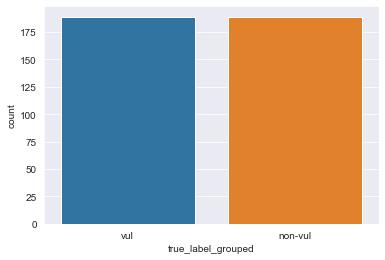

In [6]:
# Output the number of `vulnerable` and `non-vulnerable` snippets
# if the true_label is `non-vul`, it means the snippet is non-vulnerable, otherwise it's vulnerable
print("Number of vulnerable snippets: ", df[df['true_label'] != 'non-vul'].shape[0])
print("Number of not-vulnerable snippets: ", df[df['true_label'] == 'non-vul'].shape[0])

# Create a new column to group all vulnerable classes into one class
df['true_label_grouped'] = df['true_label'].apply(lambda x: x if x == 'non-vul' else 'vul')

# Output a bar chart for the number of vulnerable and non-vulnerable snippets. Group all vulnerable classes into one class.
# if the true_label is `non-vul`, it means the snippet is non-vulnerable, otherwise it's vulnerable
sns.set_style("darkgrid")
sns.countplot(x='true_label_grouped', data=df)

# Save the plot
plt.savefig('./artifacts/vul_nonvul.png')

Next, output the number of vulnerable and non-vulnerable snippets per language.

In [7]:
# Output the number of vulnerable and non-vulnerable snippets per language.
print("Number of vulnerable snippets per language: ")
print(df[df['true_label'] != 'non-vul']['language'].value_counts())
print("---------------------------------------------------------")
print("Number of non-vulnerable snippets per language: ")
print(df[df['true_label'] == 'non-vul']['language'].value_counts())

Number of vulnerable snippets per language: 
c             44
java          42
python        38
cpp           36
javascript    29
Name: language, dtype: int64
---------------------------------------------------------
Number of non-vulnerable snippets per language: 
c             44
java          42
python        38
cpp           36
javascript    29
Name: language, dtype: int64


In [8]:
# Make a table to show the number of vulnerable and non-vulnerable snippets per language
table = pd.crosstab(df['language'], df['true_label_grouped'])
table['total'] = table['non-vul'] + table['vul']
table = table.sort_values(by='total', ascending=False)  
table
    

true_label_grouped,non-vul,vul,total
language,,,
c,44,44,88
java,42,42,84
python,38,38,76
cpp,36,36,72
javascript,29,29,58


Output the number of snippets per CWE-type.

Number of snippets per CWE-type: 
CWE-78     15
CWE-22     15
CWE-77     15
CWE-79     13
CWE-89     12
CWE-20     11
CWE-287    11
CWE-798     9
CWE-190     9
CWE-476     9
CWE-787     8
CWE-918     8
CWE-94      7
CWE-502     6
CWE-416     6
CWE-125     6
CWE-119     6
CWE-269     5
CWE-362     5
CWE-434     4
CWE-352     3
CWE-863     2
CWE-276     2
CWE-862     1
CWE-306     1
Name: true_label, dtype: int64


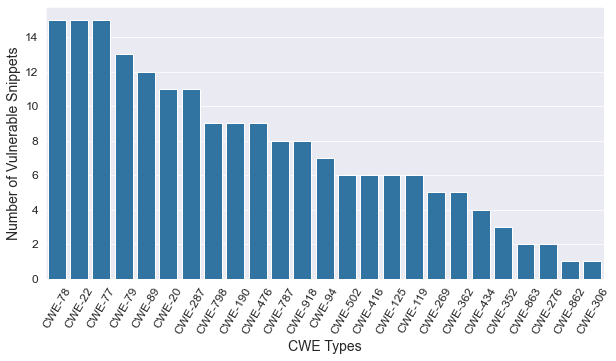

In [9]:
# First pre-process to capitalize "CWE" except for "non-vul"
df['true_label'] = df['true_label'].apply(lambda x: x.upper() if x != 'non-vul' else x)

# Output the number of snippets per CWE-type, except for 'non-vul'.
print("Number of snippets per CWE-type: ")
print(df[df['true_label'] != 'non-vul']['true_label'].value_counts())

# Create a bar chart to visualize the number of snippets per CWE-type, except for 'non-vul'.
# All bars must be colored with the same color and they should be sorted in descending order.
plt.figure(figsize=(10, 5))
sns.set_style("darkgrid")
sns.countplot(x='true_label', data=df[df['true_label'] != 'non-vul'], order=df[df['true_label'] != 'non-vul']['true_label'].value_counts().index, color=sns.color_palette("tab10")[0])
plt.xticks(rotation=60, fontsize=12)
plt.yticks(fontsize=12)
# plt.tick_params(labelsize=11.5)
# plt.title('Number of snippets per CWE-type')
plt.xlabel('CWE Types', fontsize=14)
plt.ylabel('Number of Vulnerable Snippets', fontsize=14)
plt.savefig('./artifacts/num_snippets_per_cwe_type.pdf', bbox_inches='tight', dpi=200)
plt.show()

# Color reference: https://seaborn.pydata.org/tutorial/color_palettes.html, https://stackoverflow.com/questions/42661707/seaborn-light-palette-custom-length

In [10]:
# Output the number of snippets in each language per CWE-type, except for 'non-vul'.
# First, Python.
print("Number of snippets per CWE-type in Python: ")
print(df[(df['true_label'] != 'non-vul') & (df['language'] == 'python')]['true_label'].value_counts())

Number of snippets per CWE-type in Python: 
CWE-79     3
CWE-89     3
CWE-78     3
CWE-20     3
CWE-22     3
CWE-287    3
CWE-502    3
CWE-77     3
CWE-918    3
CWE-94     3
CWE-787    2
CWE-434    2
CWE-798    2
CWE-352    1
CWE-269    1
Name: true_label, dtype: int64


In [11]:
# Second, C.!~
print("Number of snippets per CWE-type in C: ") 
print(df[(df['true_label'] != 'non-vul') & (df['language'] == 'c')]['true_label'].value_counts())

Number of snippets per CWE-type in C: 
CWE-787    3
CWE-79     3
CWE-362    3
CWE-798    3
CWE-119    3
CWE-77     3
CWE-190    3
CWE-476    3
CWE-22     3
CWE-125    3
CWE-78     3
CWE-416    3
CWE-287    2
CWE-20     2
CWE-89     2
CWE-269    1
CWE-863    1
Name: true_label, dtype: int64


In [12]:
# Third, C++.
print("Number of snippets per CWE-type in C++: ")
print(df[(df['true_label'] != 'non-vul') & (df['language'] == 'cpp')]['true_label'].value_counts())

Number of snippets per CWE-type in C++: 
CWE-89     3
CWE-416    3
CWE-78     3
CWE-125    3
CWE-22     3
CWE-476    3
CWE-190    3
CWE-77     3
CWE-119    3
CWE-787    2
CWE-287    2
CWE-798    2
CWE-79     1
CWE-362    1
CWE-276    1
Name: true_label, dtype: int64


In [13]:
# Fourth, JavaScript.
print("Number of snippets per CWE-type in JavaScript: ")
print(df[(df['true_label'] != 'non-vul') & (df['language'] == 'javascript')]['true_label'].value_counts())

Number of snippets per CWE-type in JavaScript: 
CWE-79     3
CWE-78     3
CWE-20     3
CWE-22     3
CWE-77     3
CWE-918    3
CWE-94     3
CWE-287    2
CWE-89     1
CWE-352    1
CWE-434    1
CWE-798    1
CWE-362    1
CWE-863    1
Name: true_label, dtype: int64


In [14]:
# Fifth, Java.
print("Number of snippets per CWE-type in Java: ")
print(df[(df['true_label'] != 'non-vul') & (df['language'] == 'java')]['true_label'].value_counts())

Number of snippets per CWE-type in Java: 
CWE-89     3
CWE-78     3
CWE-20     3
CWE-22     3
CWE-269    3
CWE-476    3
CWE-79     3
CWE-190    3
CWE-502    3
CWE-77     3
CWE-287    2
CWE-918    2
CWE-94     1
CWE-306    1
CWE-787    1
CWE-798    1
CWE-862    1
CWE-434    1
CWE-352    1
CWE-276    1
Name: true_label, dtype: int64


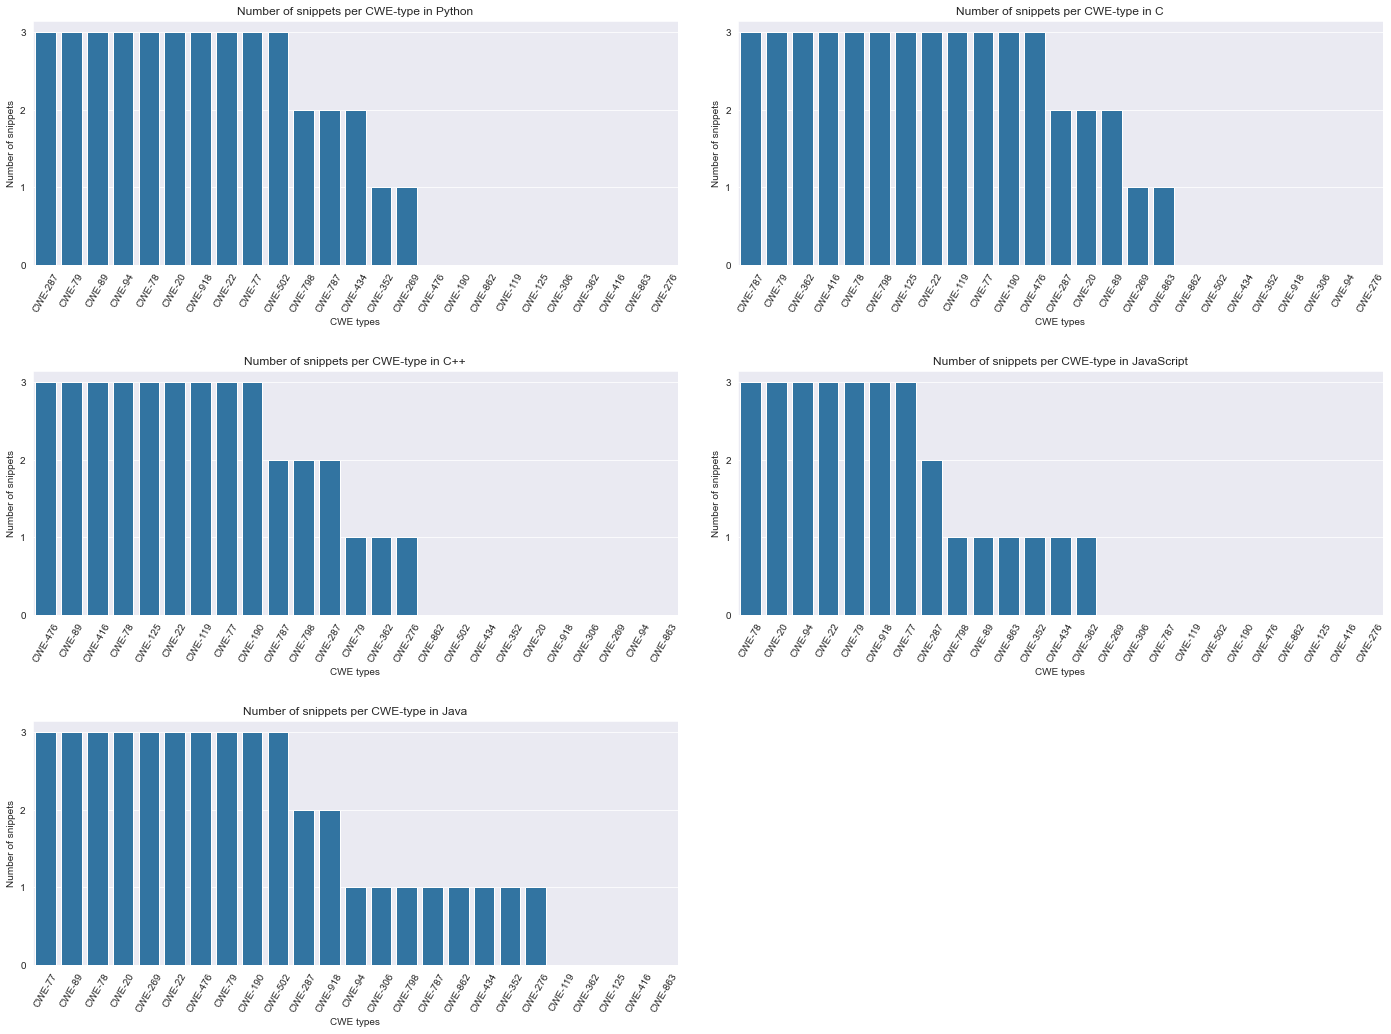

In [16]:
# Define your class list, excluding 'non-vul'
class_list_without_nonvul = [
    'CWE-787', 'CWE-79', 'CWE-89', 'CWE-416', 'CWE-78', 'CWE-20', 'CWE-125',
    'CWE-22', 'CWE-352', 'CWE-434', 'CWE-862', 'CWE-476', 'CWE-287', 'CWE-190',
    'CWE-502', 'CWE-77', 'CWE-119', 'CWE-798', 'CWE-918', 'CWE-306', 'CWE-362',
    'CWE-269', 'CWE-94', 'CWE-863', 'CWE-276'
]

plt.figure(figsize=(20, 15))

languages = ['python', 'c', 'cpp', 'javascript', 'java']
for i, language in enumerate(languages, start=1):
    ax = plt.subplot(3, 2, i)  # Adjusted subplot size for fitting all plots

    # Filter the DataFrame for the current language and exclude 'non-vul'
    df_filtered = df[(df['language'] == language) & (df['true_label'].isin(class_list_without_nonvul))]
    
    # Create a series with counts of each CWE, ensuring all CWEs in class_list are included and set to 0 if absent
    cwe_counts = df_filtered['true_label'].value_counts().reindex(class_list_without_nonvul, fill_value=0)

    # Sort the counts in descending order for plotting
    cwe_counts_sorted = cwe_counts.sort_values(ascending=False)

    # Plot
    sns.barplot(x=cwe_counts_sorted.index, y=cwe_counts_sorted.values, color=sns.color_palette("tab10")[0])
    ax.xaxis.set_tick_params(rotation=60)  # Might need rotation due to the number of CWEs
    ax.set_xlabel('CWE types')
    ax.set_ylabel('Number of snippets')
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    plt.title(f'Number of snippets per CWE-type in {dict_language[language]}')

# Adjust layout to ensure no overlap and enough space
plt.tight_layout(pad=3.0)

plt.savefig('./artifacts/num_snippets_per_cwe_type_per_language_descending.pdf', bbox_inches='tight', dpi=200)


In [17]:
'''
Furthermore, we will output the number of snippets per CWE-type across all five languages in a table.
Row: CWE-type, Column: Language, Value: Number of snippets. In the end of the column in each row, we will output the name of CWE-type.
And the row has to be ordered by the ranking of the top 25 CWEs.
'''

# Create a table to show the number of snippets per CWE-type across all five languages exoept for 'non-vul'
# Define your class list, excluding 'non-vul'
class_list_without_nonvul = [
    'CWE-787', 'CWE-79', 'CWE-89', 'CWE-416', 'CWE-78', 'CWE-20', 'CWE-125',
    'CWE-22', 'CWE-352', 'CWE-434', 'CWE-862', 'CWE-476', 'CWE-287', 'CWE-190',
    'CWE-502', 'CWE-77', 'CWE-119', 'CWE-798', 'CWE-918', 'CWE-306', 'CWE-362',
    'CWE-269', 'CWE-94', 'CWE-863', 'CWE-276'
]

languages = ['python', 'c', 'cpp', 'javascript', 'java']
# Create a table to show the number of snippets per CWE-type across all five languages
table = pd.crosstab(df['true_label'], df['language'])
table['total'] = table.sum(axis=1)
table = table.sort_values(by='total', ascending=False)
table = table.drop(columns='total')
table = table.reindex(class_list_without_nonvul)
# also, order the columns based on the array `languages`
table = table[languages]
table

language,python,c,cpp,javascript,java
true_label,,,,,
CWE-787,2,3,2,0,1
CWE-79,3,3,1,3,3
CWE-89,3,2,3,1,3
CWE-416,0,3,3,0,0
CWE-78,3,3,3,3,3
CWE-20,3,2,0,3,3
CWE-125,0,3,3,0,0
CWE-22,3,3,3,3,3
CWE-352,1,0,0,1,1


## Analyze the data source from the dataset

We will analyze the data source from the dataset. So far, this dataset has reffered to the following sources:
- CVEfixes
- cwe-snippets
- JSVulnerabilityDataSet


Number of each source: 
CWE-snippets    208
CVEfixes        147
JSV              23
Name: source, dtype: int64


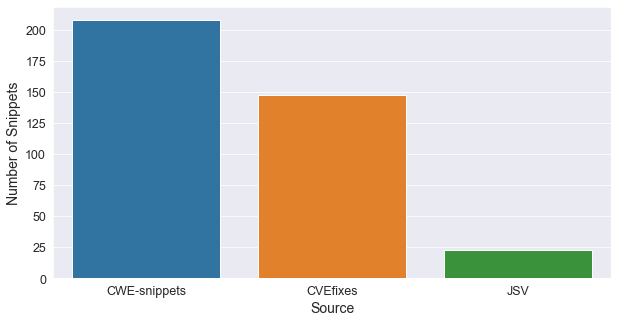

In [18]:
# In `source` column, count the number of each source
source_counts = df['source'].value_counts()
print("Number of each source: ")
print(source_counts)

# Output the bar chart of the number of each source
plt.figure(figsize=(10, 5))
sns.barplot(x=source_counts.index, y=source_counts.values)
plt.tick_params(labelsize=12.5)
plt.ylabel('Number of Snippets', fontsize=14)
plt.xlabel('Source', fontsize=14)
plt.xticks(fontsize=12.5)
plt.yticks(fontsize=12.5)
plt.savefig('./artifacts/num_snippets_per_source.pdf', bbox_inches='tight', dpi=200)
plt.show()

In [19]:
# Output the number of each source for each language
source_counts_by_language = df.groupby(['language', 'source']).size().unstack(fill_value=0)
print("Number of each source for each language: ")
print(source_counts_by_language)

Number of each source for each language: 
source      CVEfixes  CWE-snippets  JSV
language                               
c                 22            66    0
cpp               27            45    0
java              19            65    0
javascript        19            16   23
python            60            16    0


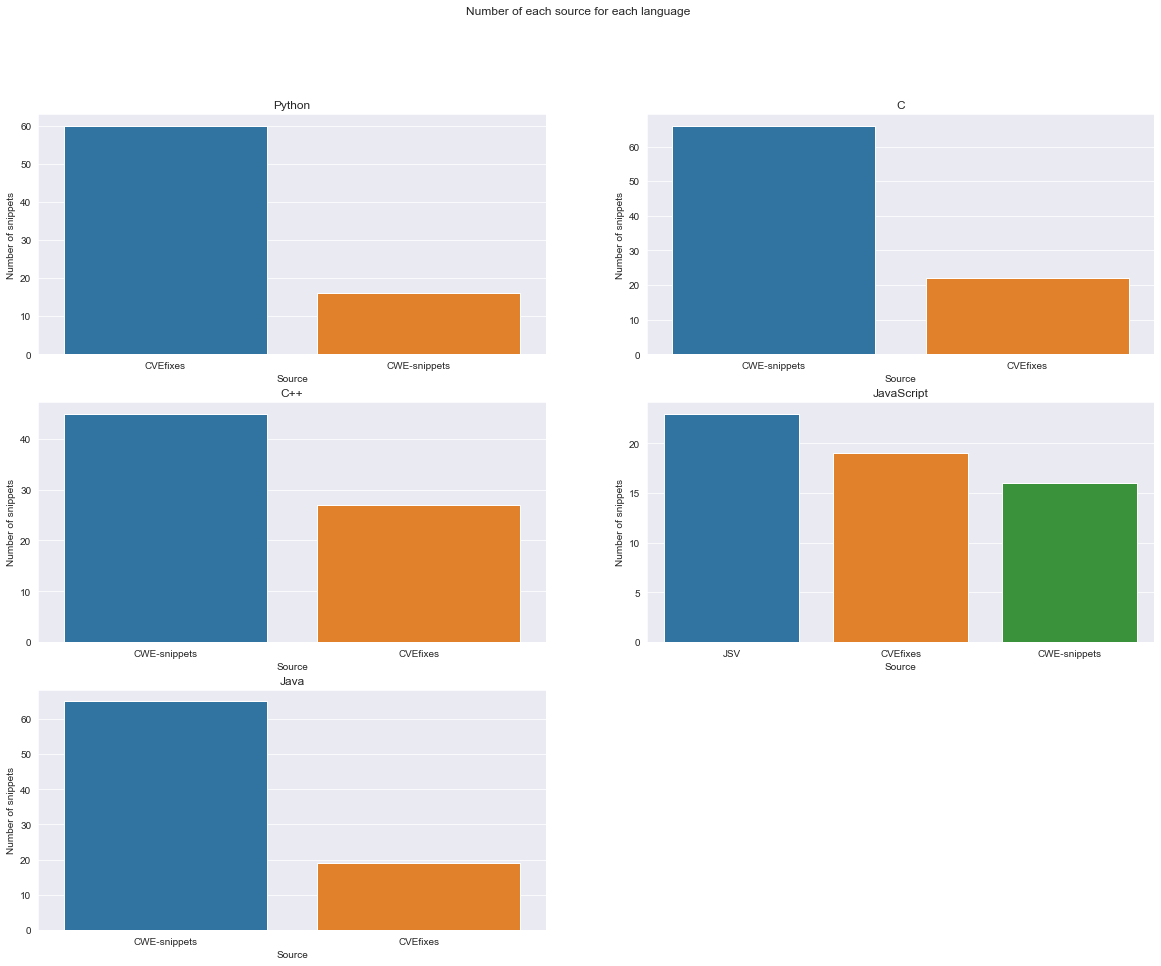

In [20]:
# Next, output the bar chart of the number of each source for each language.
# Those have to be plotted in the same figure but in different subplots. The 

# Create a figure and a set of subplots with (3,2)
fig, axes = plt.subplots(3, 2, figsize=(20, 15))
fig.suptitle('Number of each source for each language')

# Assuming 'languages' is a list of languages you're plotting
n_languages = len(languages)  # Number of languages

for i, l in enumerate(languages):
    source_counts = df[df['language'] == l]['source'].value_counts()
    sns.barplot(x=source_counts.index, y=source_counts.values, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(dict_language[l])
    axes[i//2, i%2].set_ylabel('Number of snippets')
    axes[i//2, i%2].set_xlabel('Source')

# If the number of languages is odd, hide the last subplot
if n_languages % 2 != 0:
    axes[-1, -1].axis('off')  # This makes the last subplot invisible if it's not needed

# plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the layout
plt.show()

# FIX: Make sure the consistency of the bar chart for the data source.

Next, analyze the number of source per language in `vulnerable` and `not vulnerable` snippets.

In [21]:
# Next, analyze the number of source per language in `vulnerable` and `not vulnerablew` snippets.

# First, analyze the number of source per language in `vulnerable` snippets.
source_counts_by_language_vul = df[df['true_label'] != 'non-vul'].groupby(['language', 'source']).size().unstack(fill_value=0)
print("Number of source per language in 'vulnerable' snippets: ")
print(source_counts_by_language_vul)

print()
print("---------------------------------------------------------")
print()

# Second, analyze the number of source per language in `not vulnerable` snippets.
source_counts_by_language_nonvul = df[df['true_label'] == 'non-vul'].groupby(['language', 'source']).size().unstack(fill_value=0)
print("Number of source per language in 'not vulnerable' snippets: ")
print(source_counts_by_language_nonvul)


Number of source per language in 'vulnerable' snippets: 
source      CVEfixes  CWE-snippets
language                          
c                 15            29
cpp               12            24
java              16            26
javascript        15            14
python            22            16

---------------------------------------------------------

Number of source per language in 'not vulnerable' snippets: 
source      CVEfixes  CWE-snippets  JSV
language                               
c                  7            37    0
cpp               15            21    0
java               3            39    0
javascript         4             2   23
python            38             0    0


In [ ]:
# Stats of the snippet source.
# Check the number of snippets per source.
# and then, check the severity. make a bar chart.

# likihood of occurence?
# How impactful in the codebase?
# How challenging to fix?